In [2]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# read in the data

diabetes = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/pima_indians_diabetes.csv")

# get to know the data a bit

diabetes.info()
diabetes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   blood_pressure     768 non-null    int64  
 3   skin_thickness     768 non-null    int64  
 4   insulin            768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes_pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# function library

# get confidence intervals
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# plot histo
def plt_hiso(col_name):
    plt.figure(figsize = (15,5))
    plt.hist(diabetes_yes[col_name], alpha = .5, label = "diabetes yes")
    plt.hist(diabetes_no[col_name], alpha = .5, label = "diabetes no")
    plt.legend(loc="upper right")
    plt.title(' '.join([col_name, 'levels']))
    plt.show()

In [4]:
# split up the dataset
diabetes_yes = diabetes[(diabetes['outcome'] == 1)]
diabetes_yes.info(verbose=True)

diabetes_no = diabetes[(diabetes['outcome'] == 0)]
diabetes_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        268 non-null    int64  
 1   glucose            268 non-null    int64  
 2   blood_pressure     268 non-null    int64  
 3   skin_thickness     268 non-null    int64  
 4   insulin            268 non-null    int64  
 5   bmi                268 non-null    float64
 6   diabetes_pedigree  268 non-null    float64
 7   age                268 non-null    int64  
 8   outcome            268 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 20.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        500 non-null    int64  
 1   glucose            500 non-null    int64  
 2   blood_pressure  

Before running the t-test, check whether the samples are normally distributed.

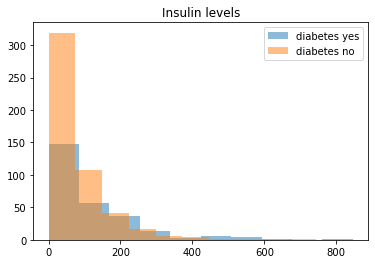

In [5]:
# insulin

plt.hist(diabetes_yes['insulin'], alpha = .5, label = "diabetes yes")
plt.hist(diabetes_no['insulin'], alpha = .5, label = "diabetes no")
plt.legend(loc="upper right")
plt.title("Insulin levels")
plt.show()

In [6]:
print(stats.describe(diabetes_no['insulin']))
print(stats.describe(diabetes_yes['insulin']))

DescribeResult(nobs=500, minmax=(0, 744), mean=68.792, variance=9774.345426853706, skewness=2.4912385539481763, kurtosis=9.35149885142989)
DescribeResult(nobs=268, minmax=(0, 846), mean=100.33582089552239, variance=19234.673318799265, skewness=1.8334954476833978, kurtosis=4.257259307676043)


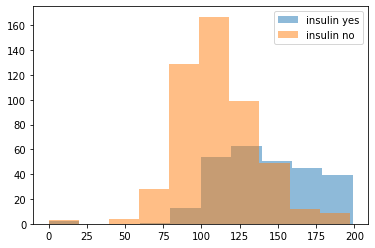

In [23]:
# glucose
plt.hist(diabetes_yes['glucose'], alpha = .5, label = "insulin yes")
plt.hist(diabetes_no['glucose'], alpha = .5, label = "insulin no")
plt.legend(loc="upper right")
plt.show()

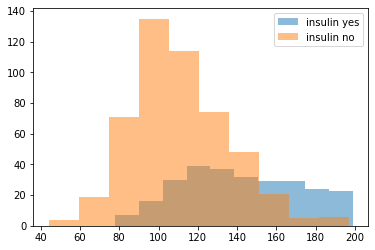

In [24]:
diabetes_yes_filtered_glucose = diabetes_yes[diabetes_yes['glucose']!= 0]
diabetes_no_filtered_glucose = diabetes_no[diabetes_no['glucose']!= 0]

plt.hist(diabetes_yes_filtered_glucose['glucose'], alpha = .5, label = "insulin yes")
plt.hist(diabetes_no_filtered_glucose['glucose'], alpha = .5, label = "insulin no")
plt.legend(loc="upper right")
plt.show()

In [56]:
stats.ttest_ind(diabetes_yes_filtered_glucose['glucose'], diabetes_no_filtered_glucose['glucose'])

Ttest_indResult(statistic=15.700907488875874, pvalue=2.4782891993106313e-48)

In [51]:
get_95_ci(diabetes_yes_filtered_glucose['glucose'], diabetes_no_filtered_glucose['glucose'])

'The difference in means at the 95% confidence interval (two-tail) is between -35.846783869363435 and -27.504587516848606.'

reject the null hypothesis

[[Text(0, 0, 'diabetes_yes'), Text(0, 0, 'diabetes_no')]]

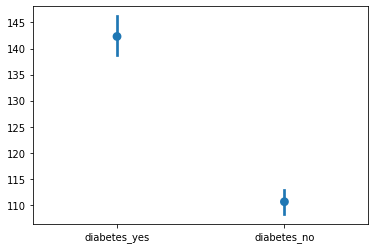

In [55]:
g = sns.pointplot(data=[diabetes_yes_filtered_glucose['glucose'],
                        diabetes_no_filtered_glucose['glucose']], join=False)
                        
g.set(xticklabels = ['diabetes_yes', 'diabetes_no'])

In [44]:
# for multiple columns

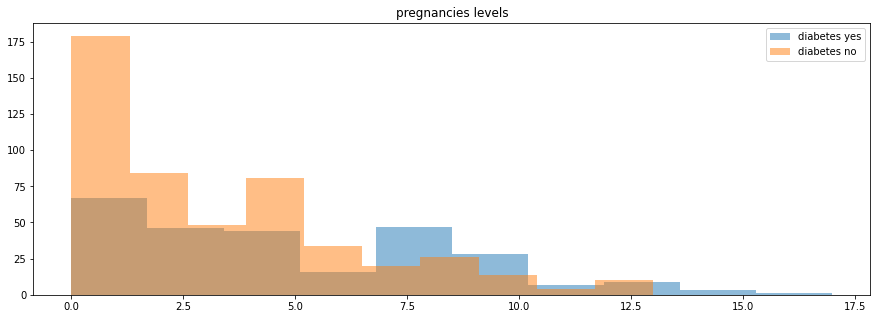

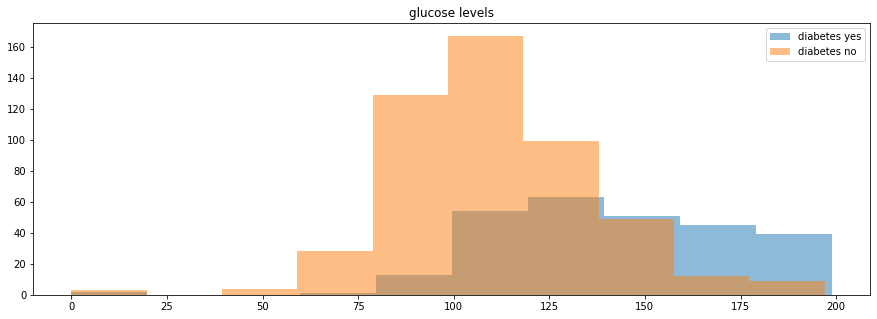

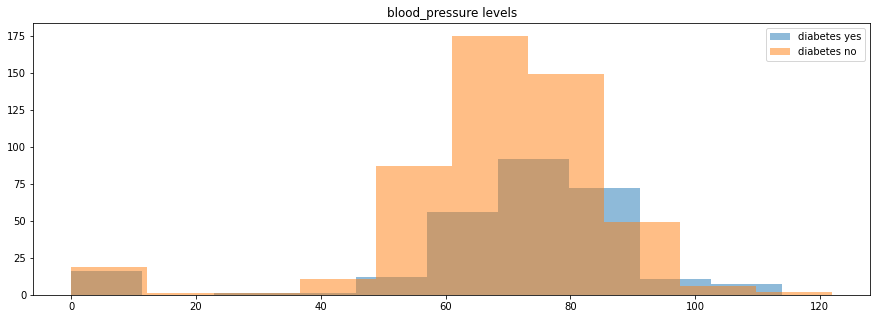

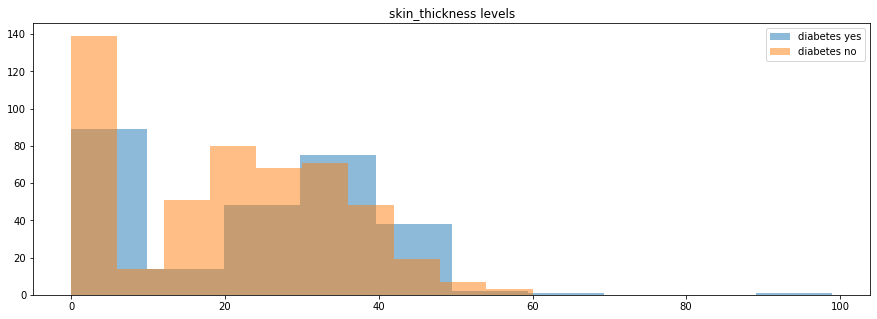

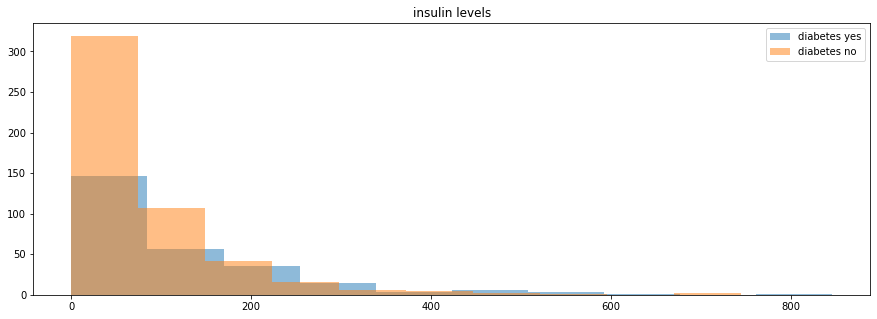

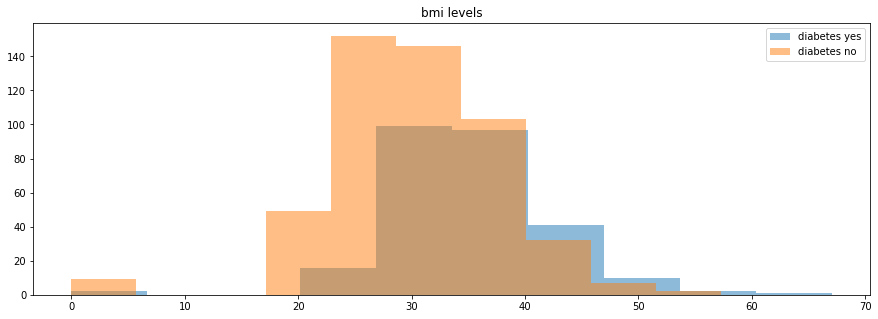

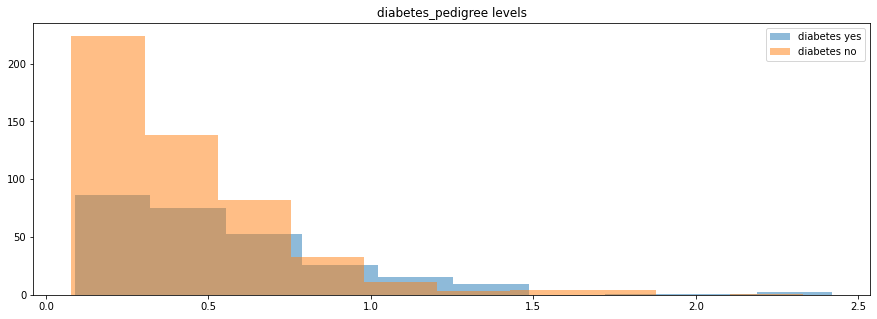

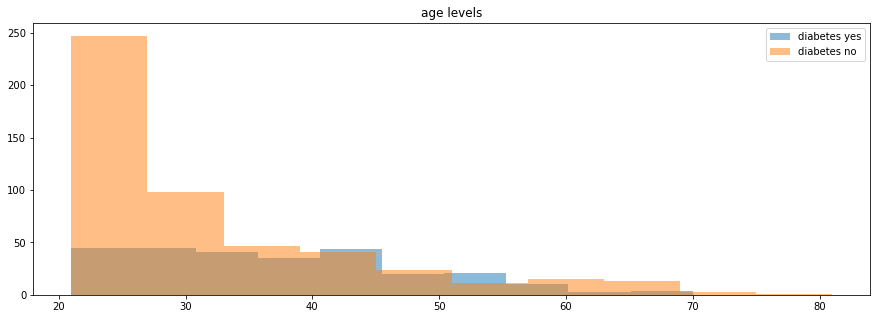

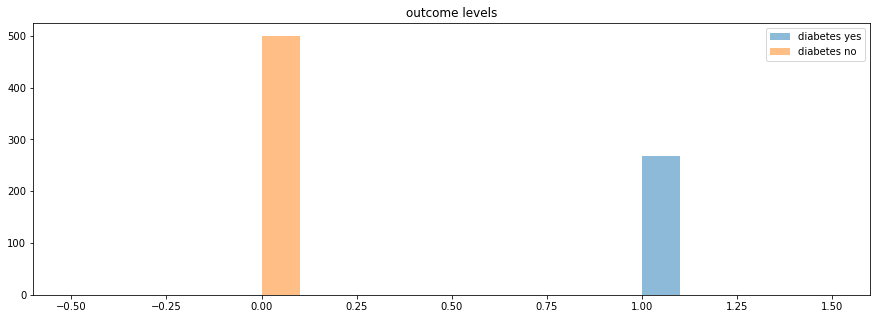

In [45]:
diabetes_columns = diabetes.columns

for c in diabetes_columns:
    plt_hiso(c)

In [46]:
g = sns.FacetGrid(tips, col="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", hue="sex")
g.add_legend()

9

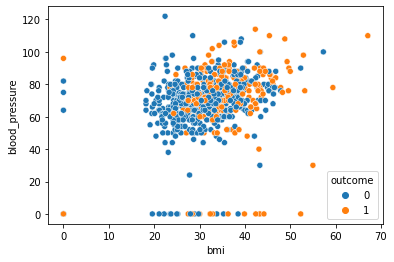

In [60]:
sns.scatterplot(data = diabetes, x = 'bmi', y = 'blood_pressure', hue = 'outcome')